In [12]:
import pandas as pd
import numpy as np
import sklearn
import os
from tqdm import tqdm, trange, tqdm_notebook
import re
import nltk
from multiprocessing import cpu_count, Pool
from functools import partial
import ipywidgets
import seaborn as sns

In [18]:
data_path = "./fnc-1/"
stances_df_test = pd.read_csv(os.path.join(data_path, "competition_test_stances.csv"), header=0)
stances_df_train = pd.read_csv(os.path.join(data_path, "train_stances.csv"), header=0)

In [19]:
print(stances_df_test["Body ID"].value_counts().mean())
print(stances_df_test["Body ID"].value_counts().std())

28.111725663716815
25.869673272906162


In [20]:
print(stances_df_train["Body ID"].value_counts().mean())
print(stances_df_train["Body ID"].value_counts().std())

29.692216280451575
28.70579958588864


In [21]:
stances_df_test.head()

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated


In [22]:
stances_df_test["Body ID"].value_counts().mean()

28.111725663716815

/home/gui/anaconda3/envs/nlu4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


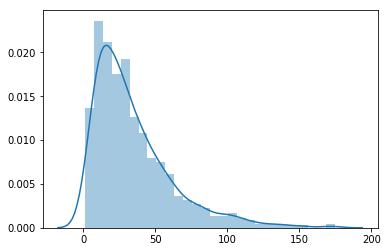

In [23]:
sns.distplot(stances_df_train[stances_df_train["Stance"] == "unrelated"].groupby("Body ID").size())

/home/gui/anaconda3/envs/nlu4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


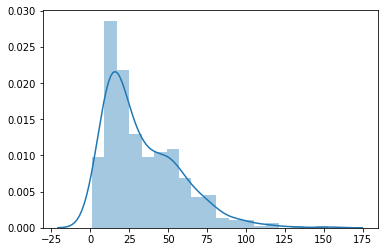

In [24]:
sns.distplot(stances_df_test[stances_df_test["Stance"] == "unrelated"].groupby("Body ID").size())

/home/gui/anaconda3/envs/nlu4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


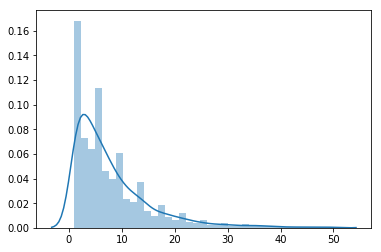

In [16]:
sns.distplot(stances_df_train[stances_df_train["Stance"] != "unrelated"].groupby("Body ID").size())

In [31]:
stances_df_train.groupby("Body ID")["Stance"].value_counts()

Body ID  Stance   
0        unrelated     35
         agree          1
4        discuss        1
5        unrelated     54
         discuss        2
6        discuss        1
7        unrelated    100
         discuss        2
8        unrelated     44
         agree          1
9        agree          2
10       unrelated     44
         discuss        2
11       unrelated     70
         discuss        1
13       unrelated     14
         agree          1
14       discuss        1
15       unrelated     25
         discuss        1
16       agree          1
17       unrelated     51
         agree          1
18       agree          1
22       unrelated     30
         discuss        1
23       unrelated     11
         discuss        1
24       agree          1
25       agree          1
                     ... 
2515     agree         12
         disagree       4
         discuss        1
2519     unrelated     14
         discuss       13
         agree          8
         disagree  